# **Linking to Google Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading the Dataset**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
lap = pd.read_csv('/content/drive/MyDrive/Elevvo Pathways Tasks/Task 4: Loan Approval Prediction/loan_approval_dataset.csv')
lap.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Data inspection**

In [12]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
lap.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
lap.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [15]:
#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(lap)
#profile.to_file("Loan_Approval_Prediction.html")

# **Data Cleaning**

**Dropping The ID Column**

In [16]:
lap = lap.drop('loan_id', axis=1)

**Handling Cloumn Names (Trimming)**

In [17]:
lap.columns = lap.columns.str.strip()

**Handling Outliers**

In [18]:
lap.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 0.999, 1], numeric_only=True)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0.000,0.0,200000.0,300000.0,2.0,300.00,-100000.0,0.0,300000.0,0.0
0.100,0.0,1100000.0,3200000.0,4.0,360.00,700000.0,400000.0,3200000.0,1000000.0
0.250,1.0,2700000.0,7700000.0,6.0,453.00,2200000.0,1300000.0,7500000.0,2300000.0
0.900,5.0,8900000.0,28000000.0,18.0,837.00,17200000.0,11700000.0,27720000.0,9700000.0
0.950,5.0,9400000.0,30900000.0,20.0,869.00,21260000.0,13900000.0,31300000.0,11100000.0
0.990,5.0,9800000.0,35700000.0,20.0,894.32,25400000.0,16732000.0,36032000.0,13100000.0
0.995,5.0,9900000.0,37000000.0,20.0,896.00,26200000.0,17766000.0,37366000.0,13600000.0
0.999,5.0,9900000.0,38473200.0,20.0,900.00,28373200.0,18873200.0,38200000.0,14373200.0
1.000,5.0,9900000.0,39500000.0,20.0,900.00,29100000.0,19400000.0,39200000.0,14700000.0


In [19]:
lap = lap[lap.loan_amount<lap.loan_amount.quantile(0.995)]
lap = lap[lap.residential_assets_value<lap.residential_assets_value.quantile(0.950)]
lap = lap[lap.commercial_assets_value<lap.commercial_assets_value.quantile(0.950)]
lap = lap[lap.bank_asset_value<lap.bank_asset_value.quantile(0.995)]
lap = lap[lap.luxury_assets_value<lap.luxury_assets_value.quantile(0.990)]

# **Numerical Data Visualization**

**Histograms**

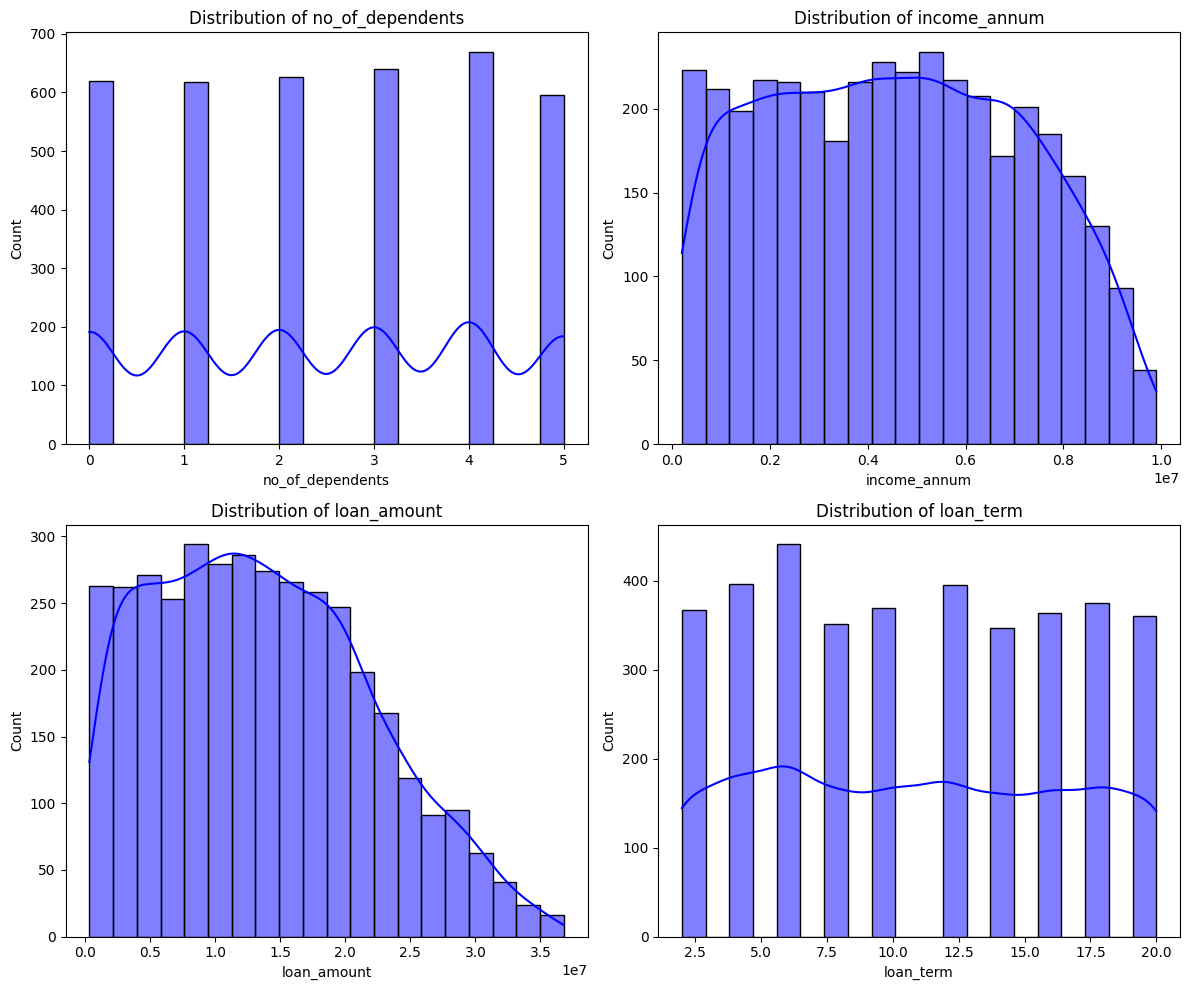

In [20]:
features=['no_of_dependents','income_annum','loan_amount','loan_term']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(lap[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

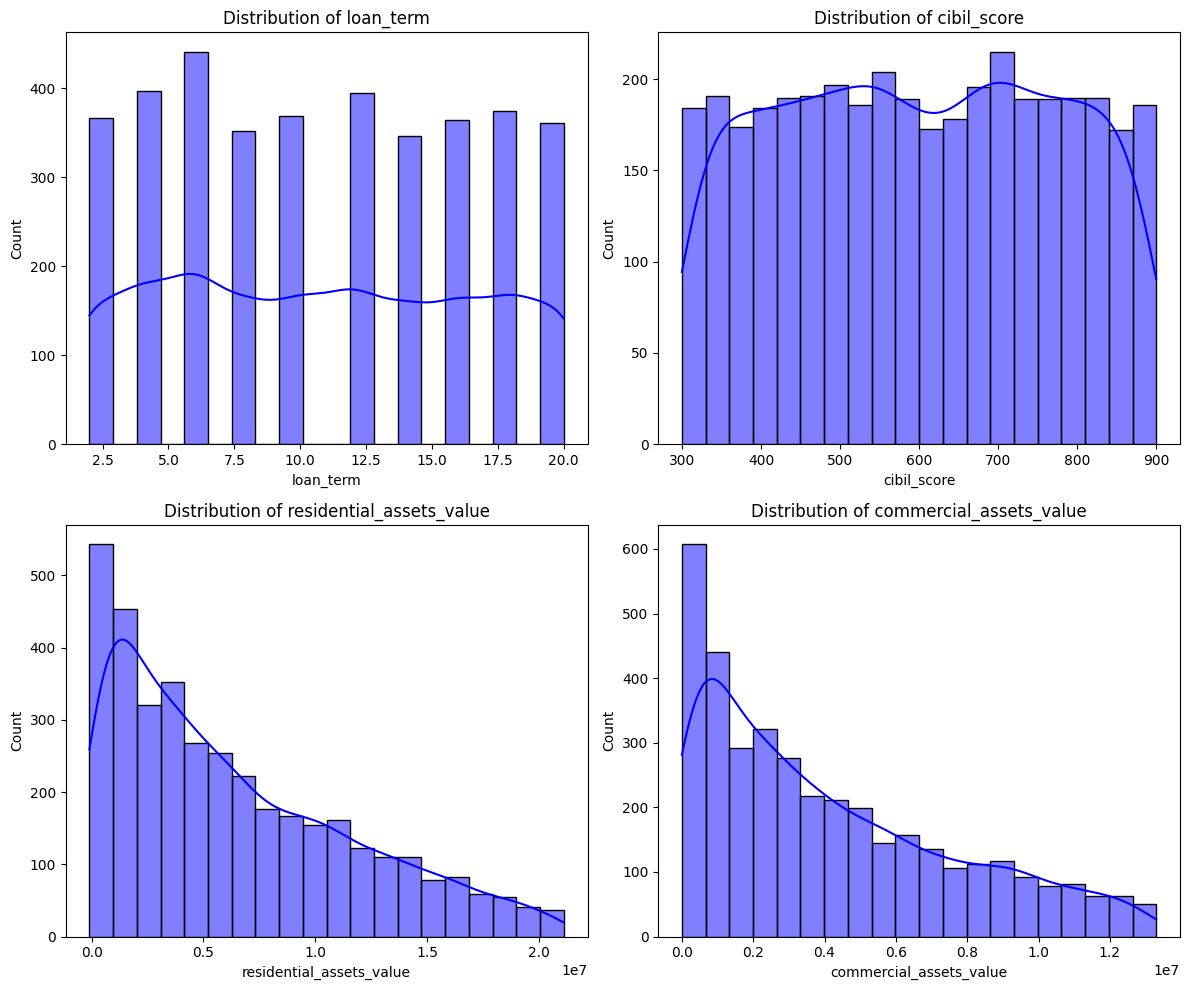

In [21]:
features=['loan_term','cibil_score','residential_assets_value','commercial_assets_value']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(lap[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

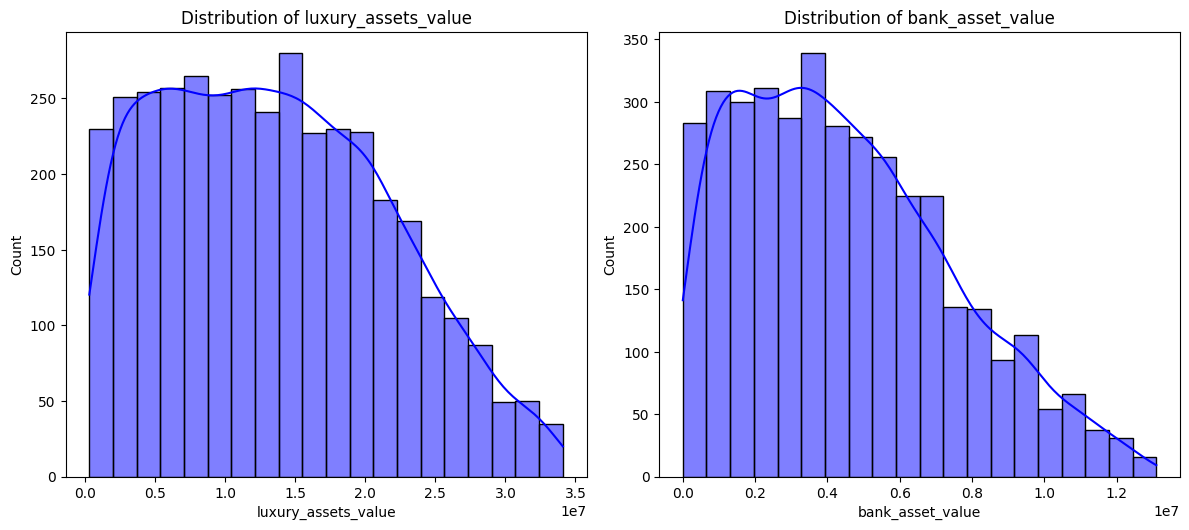

In [22]:
features=['luxury_assets_value','bank_asset_value']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(lap[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Box Plots**

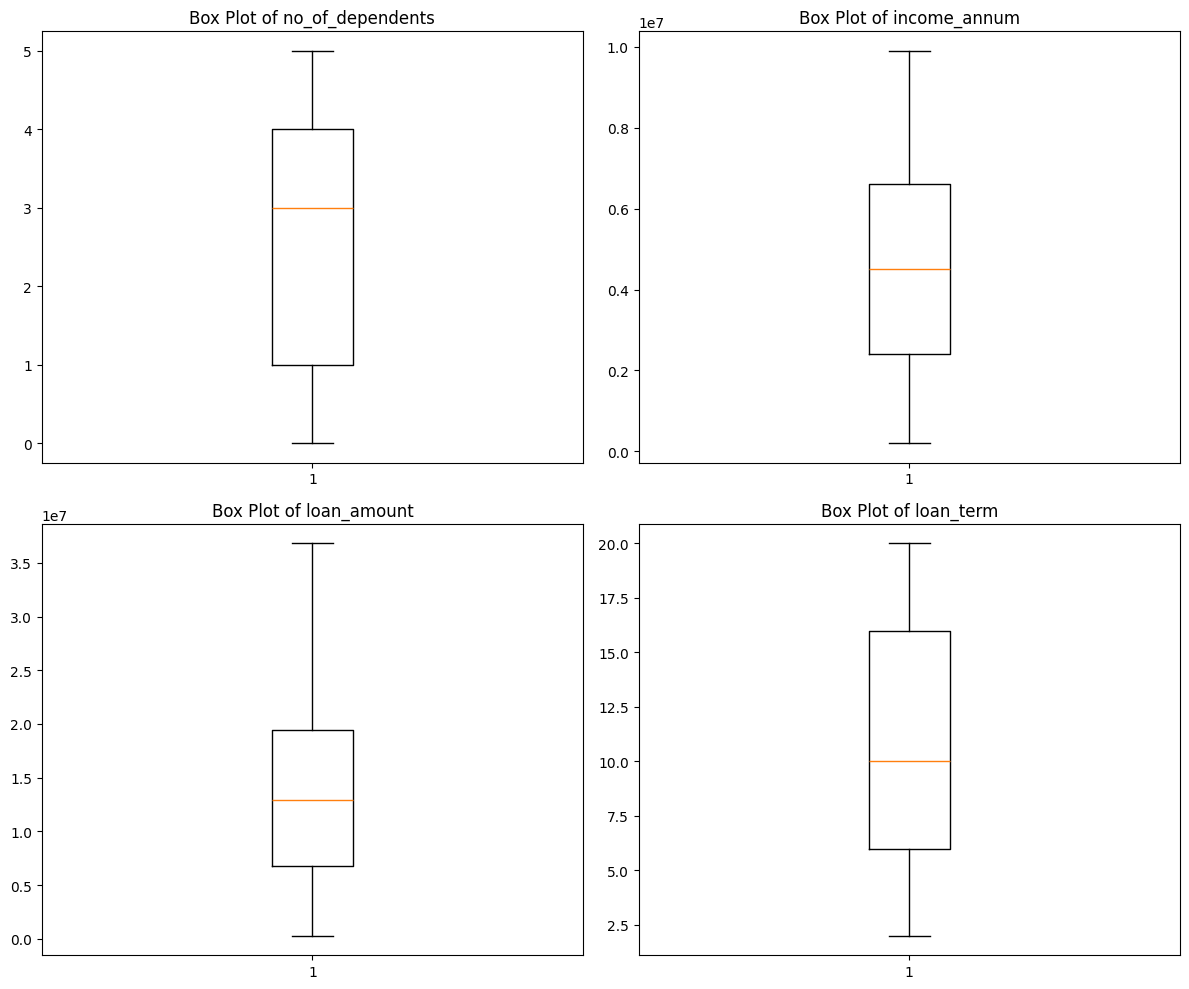

In [23]:
features=['no_of_dependents','income_annum','loan_amount','loan_term']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(lap[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

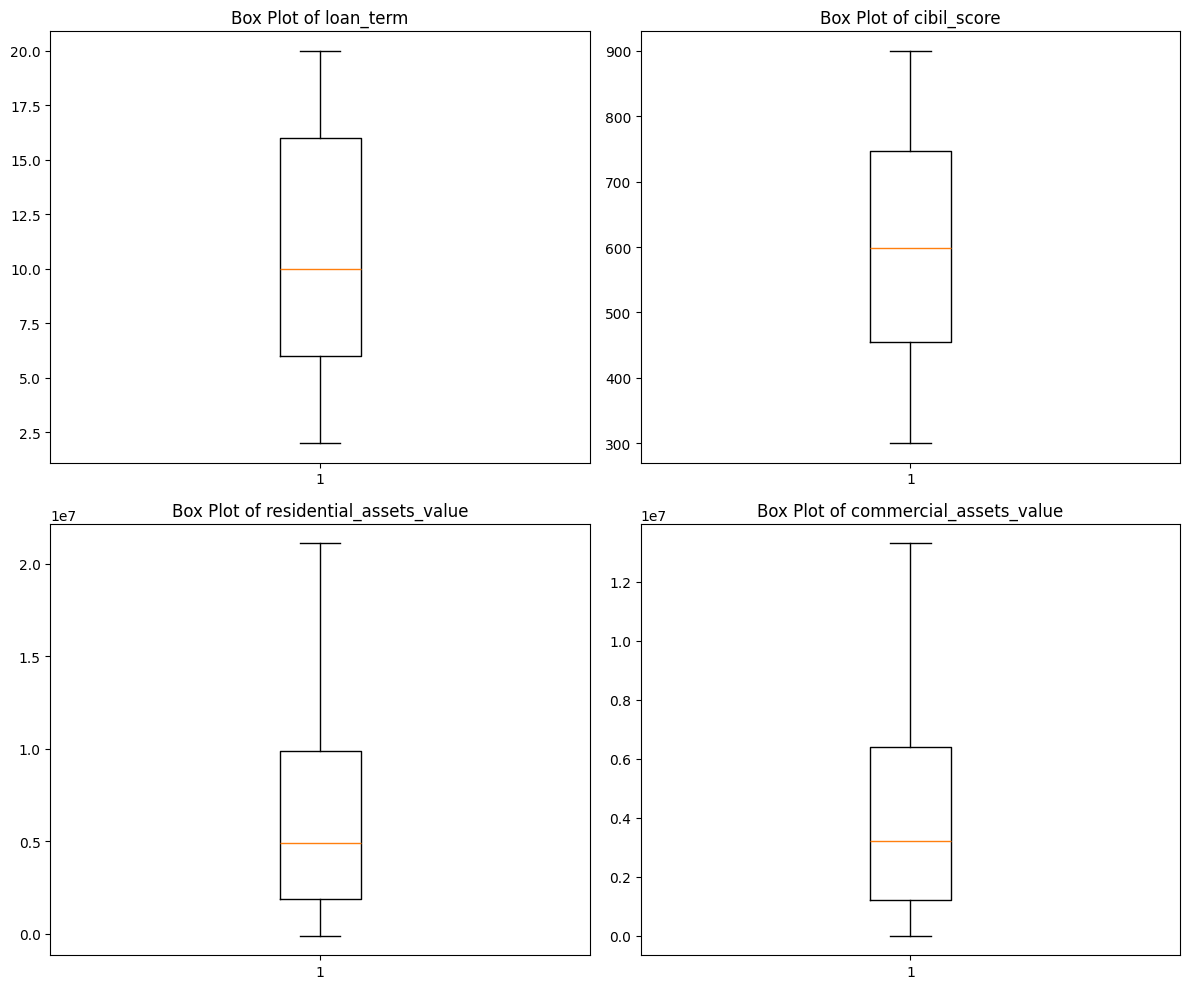

In [24]:
features=['loan_term','cibil_score','residential_assets_value','commercial_assets_value']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(lap[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

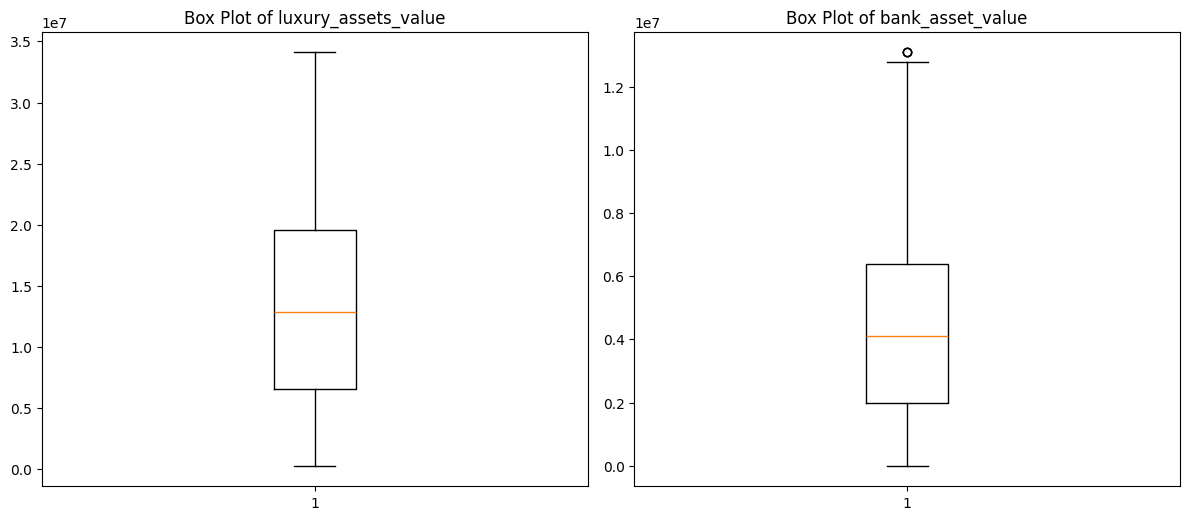

In [25]:
features=['luxury_assets_value','bank_asset_value']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(lap[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

**Heatmap to Show Correlation**

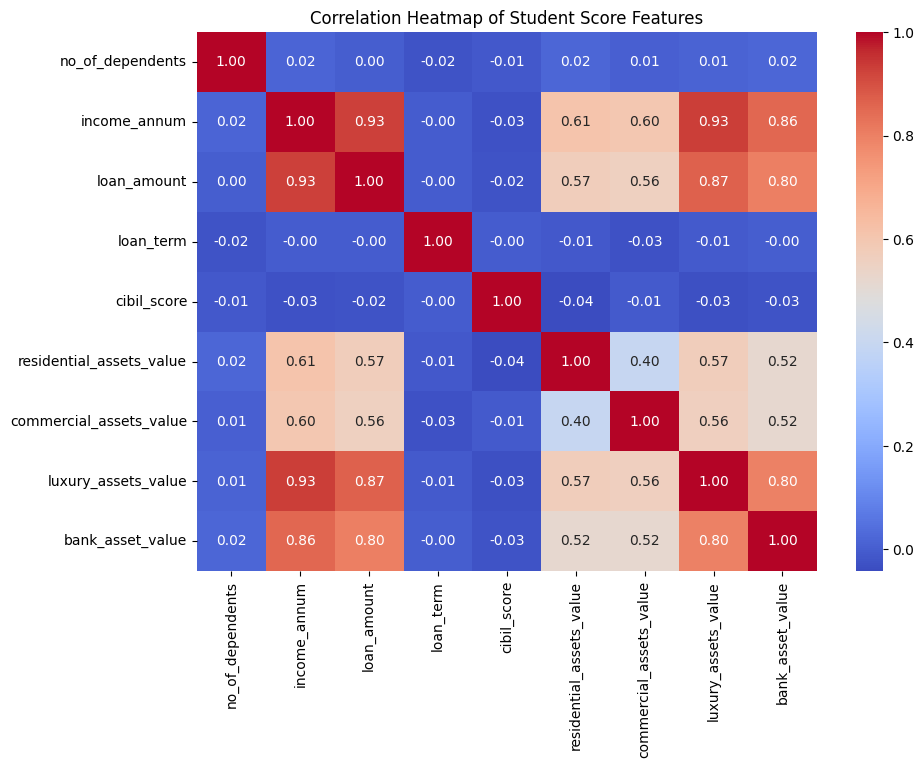

In [26]:
features = lap.select_dtypes(include=['number'])
plt.figure(figsize=(10,7))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Score Features")
plt.show()

# **Categorical Data Visualization**

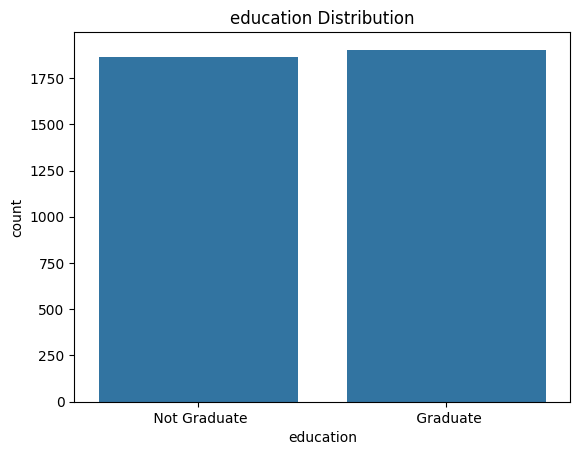

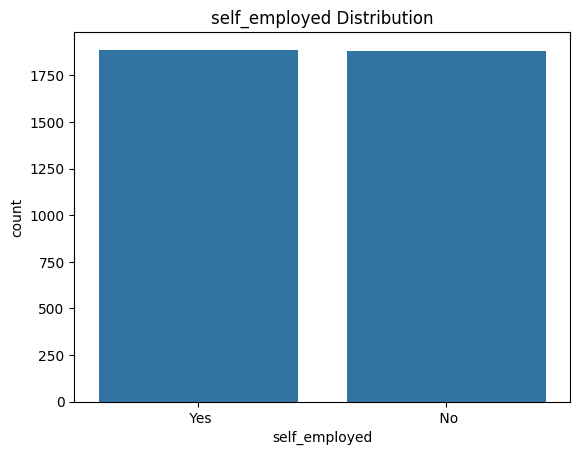

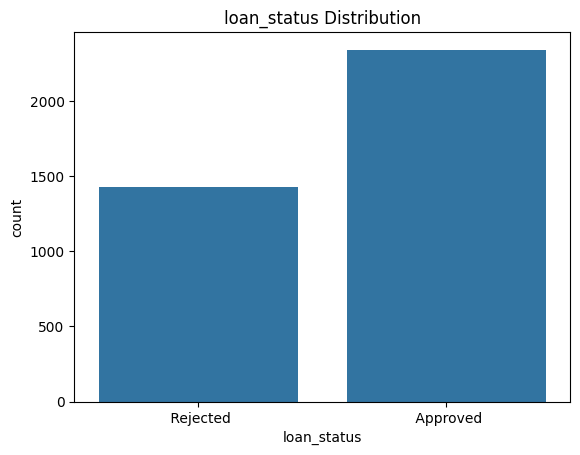

In [27]:
features=lap.select_dtypes(include=['object', 'category', 'boolean']).columns.tolist()
for feature in features:
  sns.countplot(x=feature, data=lap)
  plt.title(f"{feature} Distribution")
  plt.show()

# **Splitting Data**

In [28]:
X = lap.drop("loan_status", axis=1)
y = lap["loan_status"]
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (3768, 11)

Shape of y: (3768,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category", "boolean"]).columns

# **Creating The Pipeline**

In [31]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))  # add degree-2 features
])

# full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# transform train/test
X_train_final = preprocessor.fit_transform(X_train)
X_test_final  = preprocessor.transform(X_test)

print("Train final shape:", X_train_final.shape)
print("Test final shape:", X_test_final.shape)


Train final shape: (3014, 58)
Test final shape: (754, 58)


In [32]:
# Check scaling of numeric features
X_train_num = preprocessor.named_transformers_["num"].transform(X_train[num_cols])

print("Means:", np.mean(X_train_num, axis=0))

print("Stds:", np.std(X_train_num, axis=0, ddof=0))

Means: [-2.33242608e-16 -2.16777123e-17 -9.03667762e-17 -5.89368560e-17
 -1.81820201e-16 -3.76090812e-17  9.09031937e-17 -7.84412718e-17
  3.98859777e-17  1.00000000e+00  2.08904540e-02  8.79543014e-03
 -2.04695490e-02 -1.40416557e-02  1.53052465e-02  4.12309691e-03
  1.15331026e-02  2.11414091e-02  1.00000000e+00  9.28978103e-01
 -1.24803174e-02 -2.54031001e-02  6.10546030e-01  5.95489974e-01
  9.32219299e-01  8.54529984e-01  1.00000000e+00 -1.25543516e-02
 -1.97890791e-02  5.65858488e-01  5.57006703e-01  8.68053739e-01
  7.98700342e-01  1.00000000e+00 -5.51466643e-03 -1.40278693e-02
 -2.60993712e-02 -1.33609784e-02 -9.36284557e-03  1.00000000e+00
 -3.63345184e-02  5.11143966e-03 -3.16757672e-02 -2.66519266e-02
  1.00000000e+00  3.83848882e-01  5.68021714e-01  5.12148688e-01
  1.00000000e+00  5.59293681e-01  5.15399150e-01  1.00000000e+00
  7.94764995e-01  1.00000000e+00]
Stds: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.86311601 1.00

# **Logistic Regression Model**

In [33]:
model = LogisticRegression()
model.fit(X_train_final, y_train)

y_pred=model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (Train):\n", classification_report(y_test, y_pred))

print("Train R²:", model.score(X_train_final, y_train))
print("Test R²:", model.score(X_test_final, y_test))

Accuracy: 0.9655172413793104

Confusion Matrix (Train):
 [[452  16]
 [ 10 276]]

Classification Report (Train):
               precision    recall  f1-score   support

    Approved       0.98      0.97      0.97       468
    Rejected       0.95      0.97      0.96       286

    accuracy                           0.97       754
   macro avg       0.96      0.97      0.96       754
weighted avg       0.97      0.97      0.97       754

Train R²: 0.9568679495686795
Test R²: 0.9655172413793104
